<a href="https://colab.research.google.com/github/Vishal-74/MachineLearningProjects/blob/main/celsius_to_fehreheit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Dependencies

In [1]:
import tensorflow as tf
import numpy as np
import logging

In [2]:
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

# Training data

In [3]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


# **Build a layer:**

We'll call the layer l0 and create it by instantiating tf.keras.layers.Dense with the following configuration:

input_shape=[1] — This specifies that the input to this layer is a single value. i.e, the shape is a one-dimensional array with one member. Since this is the first (and only) layer, that input shape is the input shape of the entire model. The single value is a floating point number, representing degrees Celsius.

units=1 — This specifies the number of neurons in the layer. The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem (more later). Since this is the final layer, it is also the size of the model's output — a single float value representing degrees Fahrenheit. (In a multi-layered network, the size and shape of the layer would need to match the input_shape of the next layer.)

In [4]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

# Assemble layers into the model





Once layers are defined, they need to be assembled into a model.

The Sequential model definition takes a list of layers as an argument (layers should be in order from input to output)

This model has just a single layer, l0.

In [5]:
model = tf.keras.Sequential([l0])

# or

In [6]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[1])
])

## Compile the model, with loss and optimizer functions

Before training, the model has to be compiled. When compiled for training, the model is given:

- **Loss function** — A way of measuring how far off predictions are from the desired outcome. (The measured difference is called the "loss".)

- **Optimizer function** — A way of adjusting internal values in order to reduce the loss.


In [6]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

This are required during training in which we calculate loss at each point and it improve it with optimizer function which calculate adjustments to model internal variables until the model mirrors tha actual equation for converting celsius to fahrenheit.

learning rate - 0.1 (0.1-0.001) i.e, stepsize if the value is too samll it will take too many iterations and if it's too large accuracy goes down.

# Train the Model

 the model takes in Celsius values, performs a calculation using the current internal variables (called "weights") and outputs - Fahrenheit value.

The difference between the actual output and the desired output is calculated using the loss function, and the optimizer function directs how the weights should be adjusted.

The `epochs` argument specifies how many times this cycle should be run, and the `verbose` argument controls how much output the method produces.

In [7]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


# Display training statistics

A high loss means that the Fahrenheit degrees the model predicts is far from the corresponding value in fahrenheit_a.

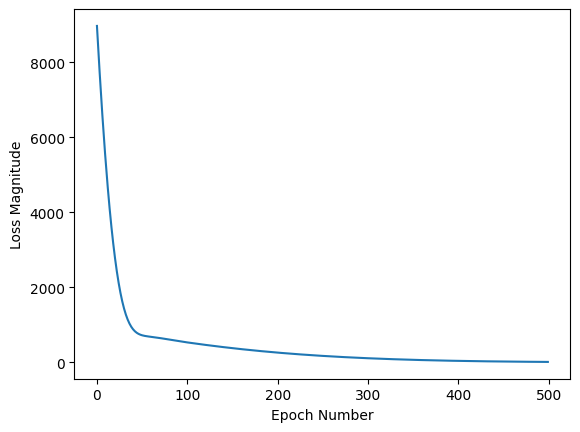

In [8]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

# Predict

In [9]:
print(model.predict([100]))

1/1 [==============================] - 0s 174ms/step
[[211.27066]]


The correct answer is $100 \times 1.8 + 32 = 212$, so our model is doing really well.

### To review


*   We created a model with a Dense layer
*   We trained it with 3500 examples (7 pairs, over 500 epochs).

Our model tuned the variables (weights) in the Dense layer until it was able to return the correct Fahrenheit value for any Celsius value.


## Layer weights

In [10]:
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[1.829968]], dtype=float32), array([28.273865], dtype=float32)]


# Experiment


In [11]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict([100.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
1/1 [==============================] - 0s 139ms/step
[[211.74745]]
1/1 [==============================] - 0s 230ms/step
Model predicts that 100 degrees Celsius is: [[211.74745]] degrees Fahrenheit
These are the l0 variables: [array([[ 0.7321049 ,  0.12704885, -0.16924284,  0.11892221]],
      dtype=float32), array([ 3.6590872, -3.175816 , -3.501442 ,  2.6091738], dtype=float32)]
These are the l1 variables: [array([[-1.0060391 ,  1.3435005 , -0.16550791, -0.11440016],
       [ 0.86188096, -0.9703171 ,  0.11159135, -0.48947436],
       [ 1.0082088 , -0.9178318 , -0.46552125,  0.3921368 ],
       [-0.8137333 ,  0.12404619,  0.9759096 ,  0.25860733]],
      dtype=float32), array([-3.7366278 ,  3.6359115 , -0.39268303, -1.8867369 ], dtype=float32)]
These are the l2 variables: [array([[-7.6584476e-01],
       [ 1.0758876e+00],
       [ 4.8190005e-02],
       [-7.4007071e-04]], dtype=float32), array([3.3865278], dtype=float32)]


# Notes -

ReLU: An activation function that allows a model to solve nonlinear problems



Softmax: A function that provides probabilities for each possible output class